## Signal Levels for Passive Optical Measurements of PSRs

This notebook develops a model for the spectral radiance in solar wavelengths emitted by the PSRs. Using this model, we can calculate the signal-to-noise ratio for a detector with known noise characteristics at the given wavelength and modeled signal levels for a PSR.

In [139]:
# Standard libraries
import numpy as np
import matplotlib.pyplot as plt
import prettyPlots as pp

# Set plotting parameters
pp.setStyle()

# Constants
pi = np.pi

### Radiative Equilibrium Approximation

Consider both downwelling solar ($F_\mathrm{s}^{\downarrow}$) and infrared ($F_\mathrm{IR}^{\downarrow}$) irradiance (W m$^{-2}$) at the surface of the PSR. In radiative equilibrium, i.e. neglecting conduction, the emitted, or upwelling infrared flux is

$$
F_\mathrm{IR}^{\uparrow} = (1-A)F_\mathrm{s}^{\downarrow} + \epsilon F_\mathrm{IR}^{\downarrow}\\
$$

<!---
Based on models (Paige *et al.*, 2010), the incident IR flux is similar to the incident solar flux in the PSRs. Therefore, $F_\mathrm{s}^{\downarrow} \sim F_\mathrm{IR}^{\downarrow}$, and

$$
\epsilon \sigma T^4 = (1-A + \epsilon)F_\mathrm{s}^{\downarrow}
$$

We then have, for the upwelling solar flux,

$$
F_\mathrm{s}^{\uparrow} = \frac{A}{1-A+\epsilon}\epsilon \sigma T^4
$$
--->

Writing the ratio of downwelling IR to solar flux as $x = F_\mathrm{IR}^{\downarrow}/F_\mathrm{s}^{\downarrow}$, the above equation becomes

$$
F_\mathrm{IR}^{\uparrow} = (1-A+\epsilon x)F_\mathrm{s}^{\downarrow}
$$

or 

$$
\epsilon \sigma T^4 = (1-A + \epsilon x)F_\mathrm{s}^{\downarrow}
$$

The upwelling (reflected) solar flux is $F_\mathrm{s}^{\uparrow} = A F_\mathrm{s}^{\downarrow}$, so we have

$$
F_\mathrm{s}^{\uparrow} = \frac{A}{1-A+\epsilon x}\epsilon \sigma T^4
$$

and assuming a Lambertian surface, the upwelling solar radiance (W m$^{-2}$ sr$^{-1}$) is

$$
\boxed{
R_\mathrm{s}^{\uparrow} = \frac{F_\mathrm{s}^{\uparrow}}{\pi} = \frac{A}{\pi(1-A+\epsilon x)}\epsilon \sigma T^4
}
$$

Although $x$ may vary among the PSRs, the simplest assumption is that the IR and solar fluxes are similar (D. Paige, *personal comm.*), i.e. $x = 1$. Another approach is to assume the emitting surfaces "seen" by the PSR are also in radiative equilibrium and isotropic. In this case, from the same arguments as above, at the PSR surface we have

$$
x = \frac{F_\mathrm{IR}^{\downarrow}}{F_\mathrm{s}^{\downarrow}} = \frac{1-A}{A}
$$

Using the above approximation, the plot below shows the ratio of upwelling solar to infrared fluxes for a range of albedos.

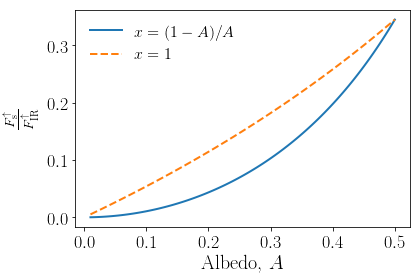

In [68]:
A = np.linspace(0.01, 0.5, 100) # albedo
emis = 0.95 # emissivity

# Ratio of downwelling IR to solar fluxes
x1 = (1-A)/A
x2 = 1

# Plot the ratio of emitted solar and solar infrared fluxes
plt.plot(A, A/(1 - A + emis*x1), label=r'$x = (1-A)/A')
plt.plot(A, A/(1 - A + emis*x2), '--', label=r'$x = 1')
plt.xlabel(r'Albedo, $A$')
plt.ylabel(r'$\frac{F_\mathrm{s}^{\uparrow}}{F_\mathrm{IR}^{\uparrow}}$')
plt.legend(frameon=False)

We found that the approximation $x = 1$ resulted in better fits to the Diviner solar-channel data than the more complicated form. (It *is* possible to fit the data with $x = (1-A)/A$, but the required Lambert albedo values are high: $> 0.35$ for Shackleton crater's illuminated walls.)

In [76]:
def upwellingSolarRadiancePSR(T, A=0.15, emis=0.95, xIR=1.0):
    # Inputs:
    #    A = solar bolometric albedo
    #    emis = IR bolometric emissivity
    #    xIR = ratio of IR to solar downwelling radiation
    #
    # Output:
    #    Upwelling solar bolometric radiance [W.m-2.sr-1]

    # Constants
    sigma = 5.67e-8 # Stefan-Boltzmann
    pi = np.pi

    # Fluxes
    F_IR_UP = emis * sigma * T**4 # Upwelling IR flux
    F_S_UP = A/(1-A+xIR*emis) * F_IR_UP # Upwelling solar flux

    # Solar bolometric radiance
    R_S_UP = F_S_UP/pi
    
    return R_S_UP

def infraredSolarRatio(A=0.15):
    # Inputs:
    #    A = solar bolometric albedo
    #
    # Output:
    #    Ratio of downwelling solar to IR irradiance
    
    xIR = (1-A)/A
    return xIR
    

Text(0,0.5,'Response')

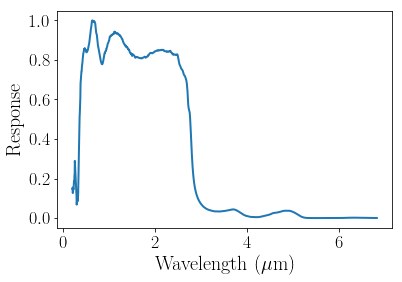

In [121]:
c1resp = np.genfromtxt('div_response_c1.txt')
plt.plot(c1resp[:,0], c1resp[:,1])
plt.xlabel(r'Wavelength ($\mu$m)')
plt.ylabel('Response')

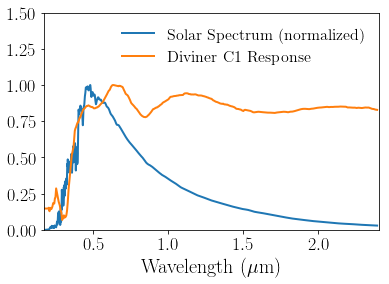

In [120]:
Fsolar = np.genfromtxt('solar_irradiance_spectrum_09Oct2009.txt')

c1resp_i = np.interp(Fsolar[:,0], c1resp[:,0]*1e3, c1resp[:,1])

plt.plot(Fsolar[:,0]/1e3, Fsolar[:,1]/np.max(Fsolar[:,1]), label=r'Solar Spectrum (normalized)')
plt.plot(Fsolar[:,0]/1e3, c1resp_i, label='Diviner C1 Response')
plt.axis([0.170,2.400,0,1.5])
plt.xlabel(r'Wavelength ($\mu$m)')
plt.legend(frameon=False)

In [137]:
# Scaling factor for (Diviner solar irradiance)/(Total solar irradiance)
radfac = np.sum(Fsolar[:,1]*c1resp_i)/np.sum(Fsolar[:,1])
print(radfac)

0.7252880012983361


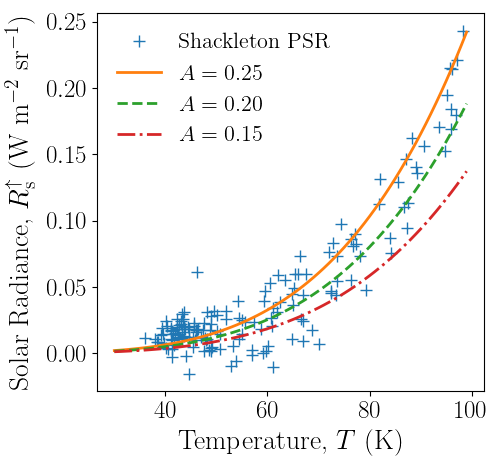

In [122]:
# Load Diviner PSR data
data = np.genfromtxt('/Users/paha3326/main/Research/moon/diviner/psr-data/diviner_shackleton_jdate_c1_c8.txt')
T8_s = data[:,2]
C1_s = data[:,1]

# Scale Diviner solar channel data by fractional detected solar radiance
Rsolar = C1_s/radfac # Total solar radiance [W.m-2.sr-1]

# Solar broadband radiance: variable albedos
Rs_A025 = upwellingSolarRadiancePSR(Trange, 0.25, 0.95, 1)
Rs_A020 = upwellingSolarRadiancePSR(Trange, 0.20, 0.95, 1)
Rs_A015 = upwellingSolarRadiancePSR(Trange, 0.15, 0.95, 1)

# Plot data and models
plt.figure(figsize=(5,5), dpi=100)
plt.plot(T8_s, Rsolar, '+', label='Shackleton PSR')
Trange = np.arange(30,100)
plt.plot(Trange, Rs_A025, '-', label=r'$A = 0.25$')
plt.plot(Trange, Rs_A020, '--', label=r'$A = 0.20$')
plt.plot(Trange, Rs_A015, '-.', label=r'$A = 0.15$')
plt.xlabel(r'Temperature, $T$ (K)')
plt.ylabel(r'Solar Radiance, $R_\mathrm{s}^{\uparrow}$ (W m$^{-2}$ sr$^{-1}$)')
plt.legend(frameon=False)

### Radiance Spectrum of a PSR

To calculate the radiance a particular wavelength, we first need the incident solar radiance. Then, we can use the model above to scale the incident radiance by a factor appropriate to the local reduction in total integrated solar flux.

Text(0.5,0.98,'Direct Illumination, \\\\ Perfect Lambertian Reflector')

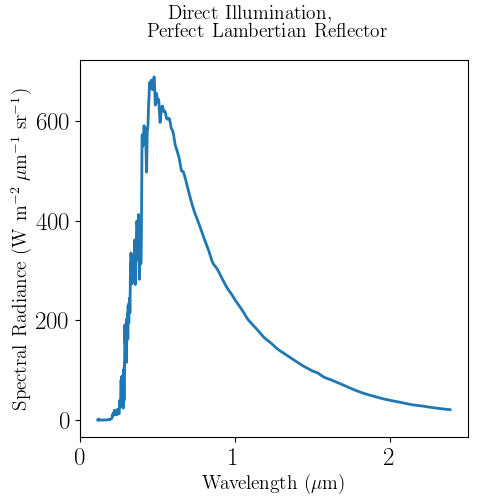

In [184]:
S0 = 1361.0 # Solar constant [W.m-2]

lam = Fsolar[:,0]*1e-3 # Wavelength in microns
F = Fsolar[:,1] # Raw solar spectrum (spectral irradiance)
S = np.trapz(F, lam) # Raw solar irradiance (flux)

# Solar radiance spectrum (perfect diffuse reflector)
I0 = (S0/S)*F/pi # [W.m-2.um-1.sr-1]

# Solar radiance
R0 = S0/pi
#print(R0)

fig = plt.figure(figsize=(5,5), dpi=100)
plt.plot(lam, I0)
plt.xlabel(r'Wavelength ($\mu$m)', fontsize=14)
plt.ylabel(r'Spectral Radiance (W m$^{-2}$ $\mu$m$^{-1}$ sr$^{-1}$)', fontsize=14)
fig.suptitle(r'Direct Illumination, \\ Perfect Lambertian Reflector', fontsize=14)

In [158]:
# Spectral radiance in the PSR
def spectralRadiancePSR(T, A0, l, Al):
    # Inputs:
    #    T = temperature of PSR
    #    A0 = Lambert (solar bolometric) reflectance of PSR
    #    l = wavelength [um]
    #    Al = Lambert reflectance at wavelength l of PSR
    # Outputs:
    #    Diffuse spectral radiance of PSR [W.m-2.um-1.sr-1]
    
    # Constants
    R0 = 433.219 # Integrated solar radiance for perfect reflector [W.m-2.sr-1]

    # Integrated solar radiance [W.m-2.sr-1]
    R = upwellingSolarRadiancePSR(T, A0)
    
    # Fraction of incident solar to PSR radiance
    fPSR = R/R0
    
    # Solar spectral radiance
    # I0 is solar radiance spectrum (perfect diffuse reflector) 
    I0_lam = np.interp(l, lam, I0)
    
    # PSR spectral radiance
    I_lam = I0_lam * fPSR * Al
    
    return I_lam
    

0.00045231526303034155


Text(0.5,0.98,'Shackleton Crater PSR: $A(\\lambda) \\equiv 0.2$')

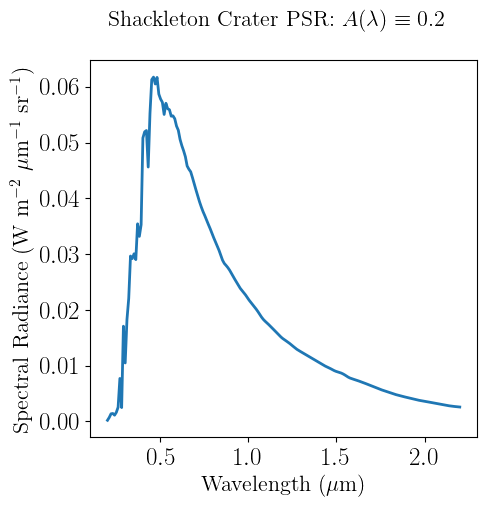

In [186]:
# Example: Constant albedo surface (flat spectrum)
A0 = 0.2 # Albedo
T = 100 # Temperature [K]
lmin = 0.2
lmax = 2.2
N = 200
l = np.linspace(lmin, lmax, N) # Wavelength [um]

Al = A0 # Reflectance at wavelength l
r = spectralRadiancePSR(T, A0, l, Al) # Spectral radiance [W.m-2.um-1.sr-1]

fig = plt.figure(figsize=(5,5), dpi=100)
plt.plot(l, r)
plt.xlabel(r'Wavelength ($\mu$m)', fontsize=16)
plt.ylabel(r'Spectral Radiance (W m$^{-2}$ $\mu$m$^{-1}$ sr$^{-1}$)', fontsize=16)
fig.suptitle(r'Shackleton Crater PSR: $A(\lambda) \equiv 0.2$', fontsize=16)